# Email Spam Detection





Name : Boobalamurugan S

Phase 1: Normal Task
    
Project Name : Email Spam Detection

Date : 2/11/2023

# Problem Statement
The goal of this project is to develop a robust email spam detection system using machine
learning techniques. By analyzing the content and characteristics of emails, the system should
be able to accurately classify incoming emails as either spam or legitimate (ham).

# Solution Approach :
To develop a robust email spam detection system using machine learning techniques, you'll need to follow a systematic approach. Here's a high-level overview of the steps you can take to achieve this goal:

1.Data Collection:

Gather a labeled dataset of emails, which includes both spam and legitimate (ham) emails. This dataset will serve as the basis for training and evaluating your machine learning model.


2.Data Preprocessing:

Clean and preprocess the email data. This may involve tasks such as text normalization (lowercasing, removing punctuation), tokenization, and stemming or lemmatization.


3.Feature Extraction:

Convert the email text into numerical features that can be used by machine learning algorithms.


4.Model Selection:

Choose the appropriate machine learning algorithm for email spam detection. Common choices include Naive Bayes, Support Vector Machines, Decision Trees, Random Forests.


5.Model Training:

Split your dataset into training and testing sets. Train your selected model on the training data, and tune hyperparameters to achieve optimal performance. Cross-validation may be used to assess model performance and prevent overfitting.


6.Model Evaluation:

7.Evaluate your model's performance using metrics such as accuracy, precision, recall, F1 score. You can also create a confusion matrix to understand false positives and false negatives.

# About Dataset :

1. Dataset is avaliable in Kaggle : https://www.kaggle.com/datasets/venky73/spam-mails-dataset

2. Dataset details also available in Kaggle

## Libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import string
nltk.download("stopwords")
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Read the Dataset

In [2]:
pd.pandas.set_option("display.max_columns",None)
dataset=pd.read_csv("/content/spam_ham_dataset.csv")
dataset.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


## Remove unwanted Features

In [3]:
data=dataset.copy()
data.drop(columns="Unnamed: 0",inplace=True)
data

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,ham,Subject: industrial worksheets for august 2000...,0


In [4]:
data.drop(columns="label",inplace=True,axis=0)


In [5]:
data.shape

(5171, 2)

## Dataset Information

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       5171 non-null   object
 1   label_num  5171 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 80.9+ KB


## Check NaN values

In [7]:
NanFea=[features for features in data.columns if data[features].isnull().sum()]
NanFea

[]

In [8]:
data.isnull().sum()

text         0
label_num    0
dtype: int64

## Check Duplicate and Remove duplicate value

In [9]:
data.duplicated().sum()

178

In [10]:
data=data.drop_duplicates()

In [11]:
data.shape

(4993, 2)

In [12]:
dataset.shape

(5171, 4)

In [13]:
data

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...
5165,"Subject: fw : crosstex energy , driscoll ranch...",0
5166,Subject: put the 10 on the ft\r\nthe transport...,0
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5169,Subject: industrial worksheets for august 2000...,0


## Check Ham and Spam details




In [14]:
data["label_num"].value_counts()


0    3531
1    1462
Name: label_num, dtype: int64

Ham-->0

Spam -->1

In [15]:
value=data["label_num"].value_counts()
total=value.sum()
Ham=(value[0]/total)*100
spam=(value[1]/total)*100
print(f"Precenatge of Ham is{np.round(Ham,2)}")
print(f"Precenatge of spam is{np.round(spam,2)}")


Precenatge of Ham is70.72
Precenatge of spam is29.28


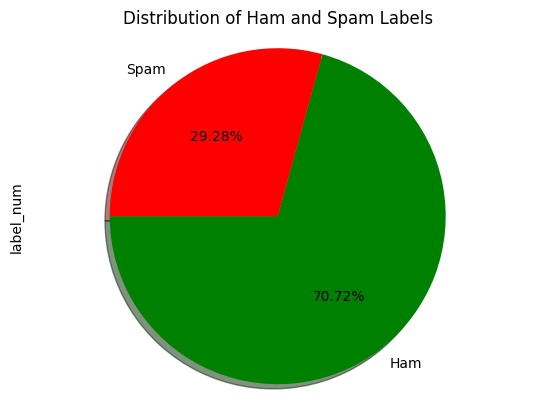

In [16]:
value=data["label_num"].value_counts()
value.plot(kind="pie",colors=["green","red"],autopct="%0.2f%%",startangle=180,labels=["Ham","Spam"],shadow=True)
plt.title("Distribution of Ham and Spam Labels")
plt.axis('equal')
plt.show()

## Using text features to find relationships and Correaltion

In [17]:
data["text"].head()

0    Subject: enron methanol ; meter # : 988291\r\n...
1    Subject: hpl nom for january 9 , 2001\r\n( see...
2    Subject: neon retreat\r\nho ho ho , we ' re ar...
3    Subject: photoshop , windows , office . cheap ...
4    Subject: re : indian springs\r\nthis deal is t...
Name: text, dtype: object

In [18]:
nltk.download('punkt')
data['num_characters'] = data['text'].apply(len)
data['num_words'] = data['text'].apply(lambda x: len(nltk.word_tokenize(x)))
data['num_sentence'] = data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [19]:
data[['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4993.000000,4993.000000,4993.000000
mean,1069.426397,233.678149,13.386942
std,1547.863387,340.702932,27.959959
min,11.000000,2.000000,1.000000
25%,256.000000,55.000000,4.000000
50%,557.000000,125.000000,7.000000
75%,1262.000000,288.000000,15.000000
max,32258.000000,8863.000000,1204.000000


In [20]:
maxVal=data["num_sentence"].max()
row=data[data["num_sentence"]==maxVal]
print(pd.DataFrame(row))



                                                  text  label_num  \
949  Subject: fw : " red , white and blue out "\r\n...          0   

     num_characters  num_words  num_sentence  
949           32258       8863          1204  


In [21]:
data[["num_characters","num_words","num_sentence"]].describe()

,num_characters,num_words,num_sentence
count,4993.000000,4993.000000,4993.000000
mean,1069.426397,233.678149,13.386942
std,1547.863387,340.702932,27.959959
min,11.000000,2.000000,1.000000
25%,256.000000,55.000000,4.000000
50%,557.000000,125.000000,7.000000
75%,1262.000000,288.000000,15.000000
max,32258.000000,8863.000000,1204.000000


In [22]:
data[data["label_num"]==0][["num_characters","num_words","num_sentence"]].describe()

,num_characters,num_words,num_sentence
count,3531.000000,3531.000000,3531.000000
mean,994.939394,230.516001,11.662419
std,1402.785831,337.018933,25.330035
min,18.000000,3.000000,1.000000
25%,241.000000,53.000000,4.000000
50%,538.000000,128.000000,7.000000
75%,1253.500000,298.500000,13.500000
max,32258.000000,8863.000000,1204.000000


In [23]:
data[data["label_num"]==1][["num_characters","num_words","num_sentence"]].describe()

,num_characters,num_words,num_sentence
count,1462.000000,1462.000000,1462.000000
mean,1249.326265,241.315321,17.551984
std,1840.112883,349.439381,33.111447
min,11.000000,2.000000,1.000000
25%,304.250000,60.000000,4.000000
50%,589.000000,119.500000,9.000000
75%,1305.000000,252.750000,19.000000
max,22073.000000,3963.000000,693.000000


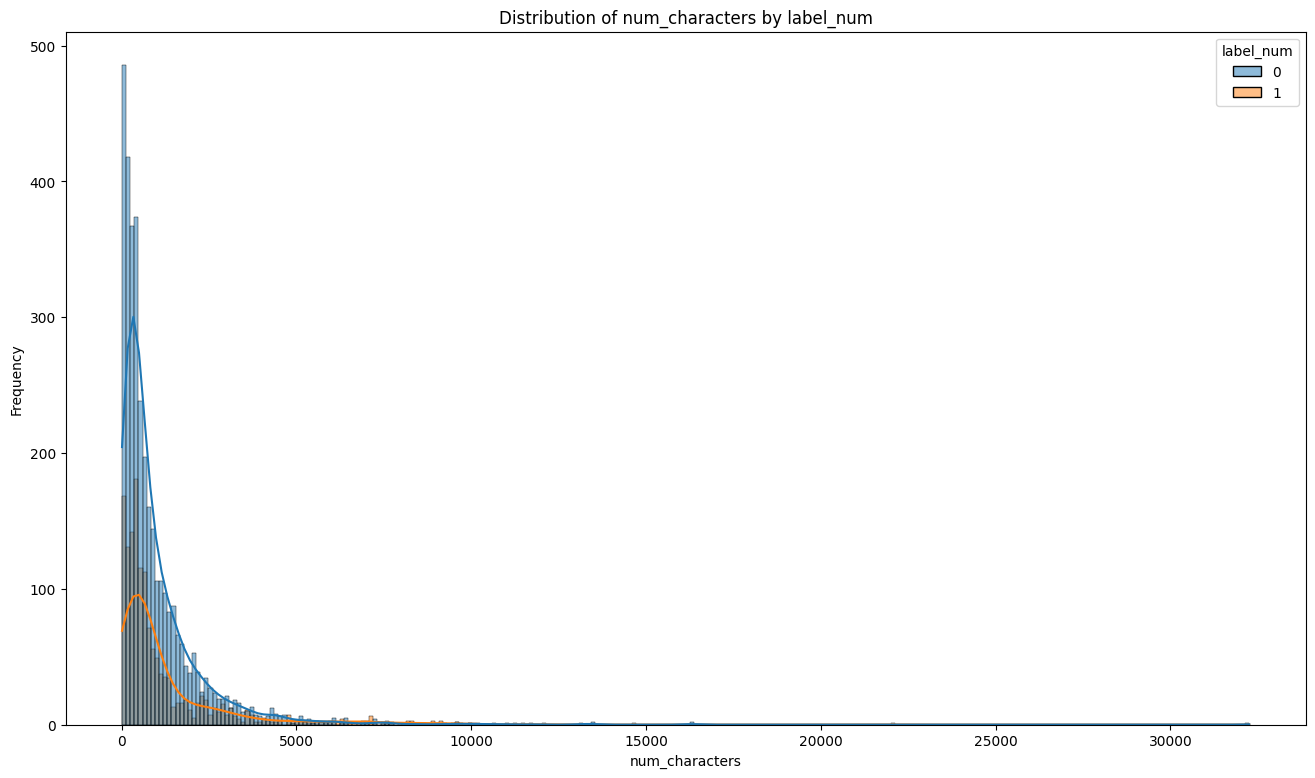

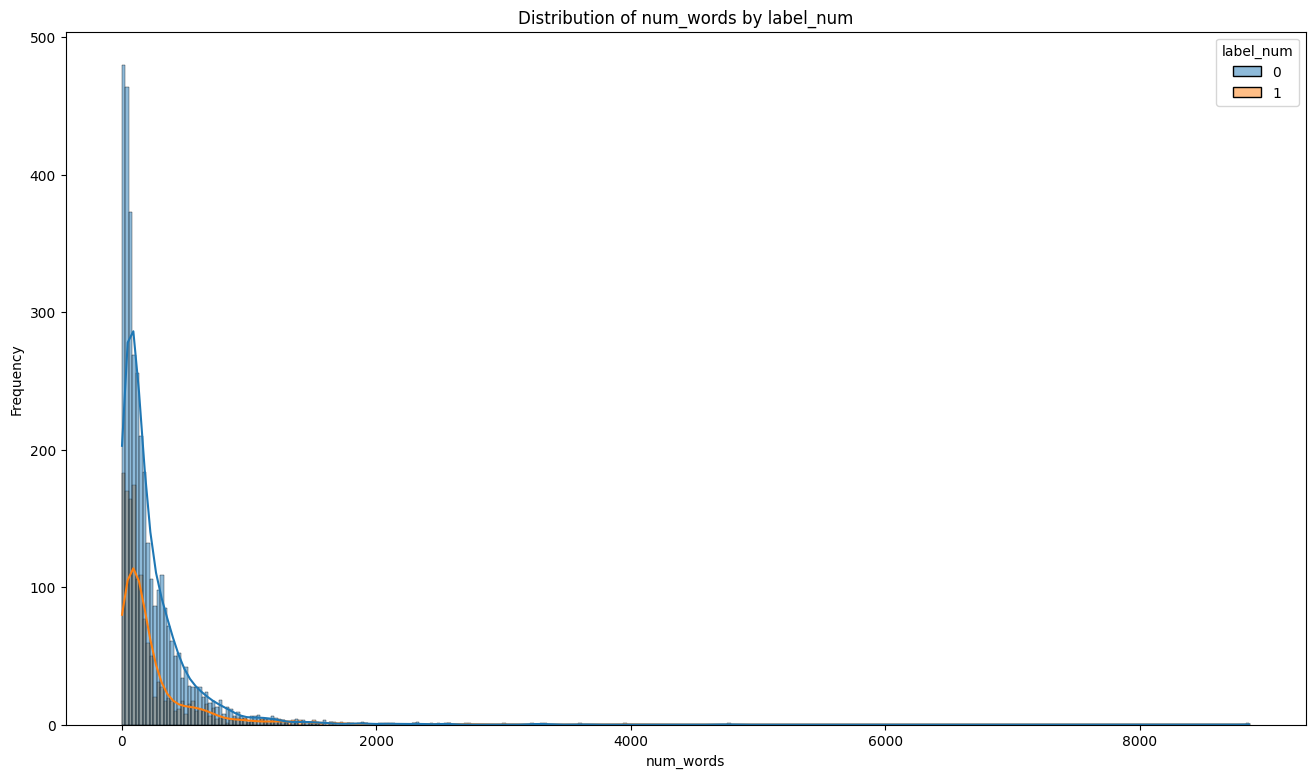

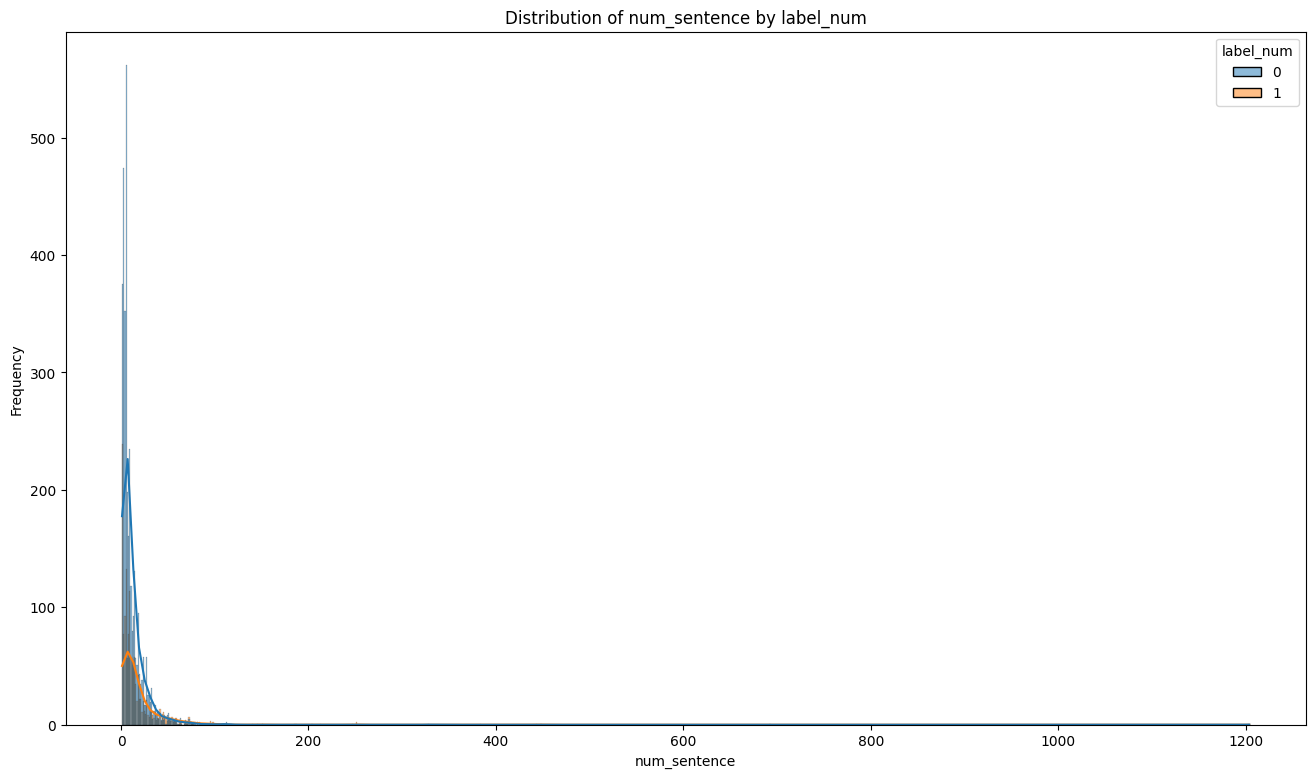

In [24]:
import seaborn as sns
x=["num_characters","num_words","num_sentence"]
for feature in x:
    plt.figure(figsize=(16, 9))
    sns.histplot(data=data, x=feature, hue="label_num", kde=True)
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {feature} by label_num")
plt.show()

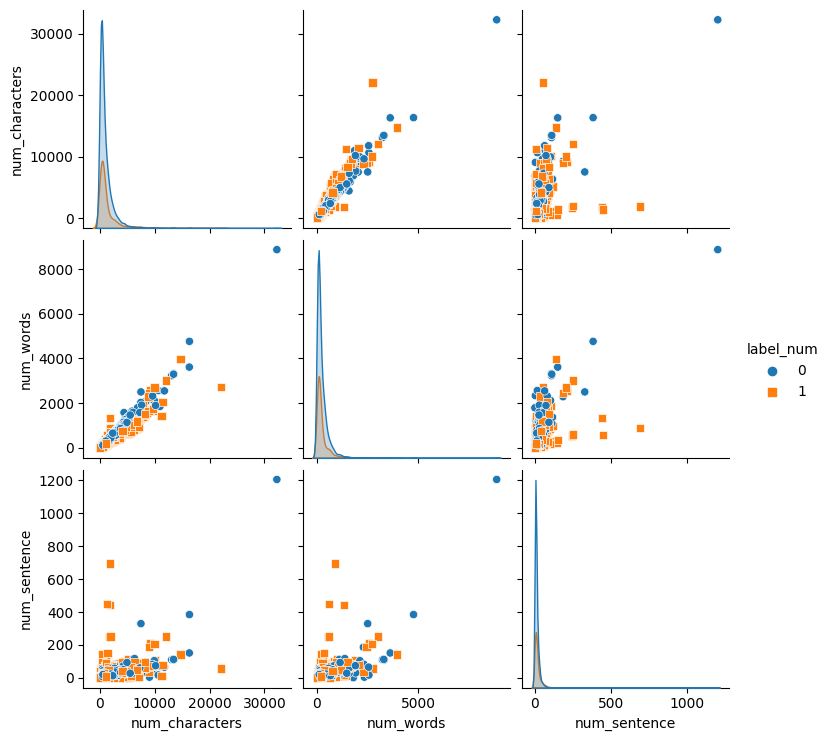

In [25]:
sns.pairplot(data,hue="label_num",diag_kind='kde', markers=["o", "s"])

<Axes: >

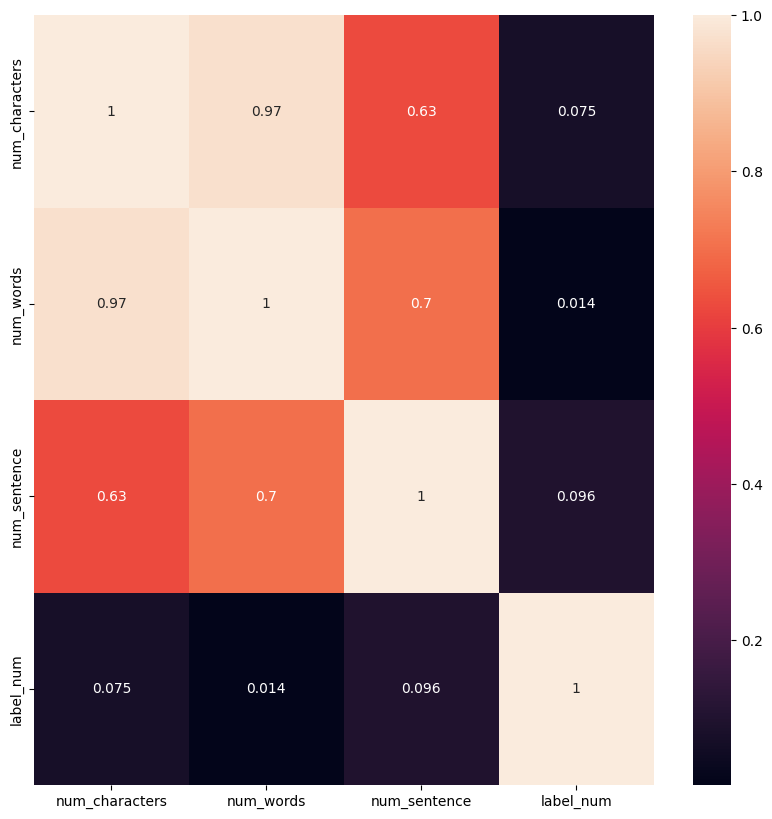

In [26]:
corr=data[["num_characters","num_words","num_sentence","label_num"]].corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [27]:
corr.style.background_gradient(cmap="coolwarm")

,num_characters,num_words,num_sentence,label_num
num_characters,1.000000,0.970492,0.630026,0.074794
num_words,0.970492,1.000000,0.703256,0.014425
num_sentence,0.630026,0.703256,1.000000,0.095863
label_num,0.074794,0.014425,0.095863,1.000000


In [28]:
data.corrwith(data["label_num"]).abs().sort_values()

num_words         0.014425
num_characters    0.074794
num_sentence      0.095863
label_num         1.000000
dtype: float64

In [29]:
data["text"]

0       Subject: enron methanol ; meter # : 988291\r\n...
1       Subject: hpl nom for january 9 , 2001\r\n( see...
2       Subject: neon retreat\r\nho ho ho , we ' re ar...
3       Subject: photoshop , windows , office . cheap ...
4       Subject: re : indian springs\r\nthis deal is t...
                              ...                        
5165    Subject: fw : crosstex energy , driscoll ranch...
5166    Subject: put the 10 on the ft\r\nthe transport...
5167    Subject: 3 / 4 / 2000 and following noms\r\nhp...
5169    Subject: industrial worksheets for august 2000...
5170    Subject: important online banking alert\r\ndea...
Name: text, Length: 4993, dtype: object

## Data preprocessing

In [30]:
data

,text,label_num,num_characters,num_words,num_sentence
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24
3,"Subject: photoshop , windows , office . cheap ...",1,414,49,3
4,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3
...,...,...,...,...,...
5165,"Subject: fw : crosstex energy , driscoll ranch...",0,869,197,9
5166,Subject: put the 10 on the ft\r\nthe transport...,0,534,156,7
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,1114,306,13
5169,Subject: industrial worksheets for august 2000...,0,573,112,20


In [31]:
# function to remove punctuation and stopwords
def text_process(text):
    non_punc = [char for char in text if char not in string.punctuation]
    non_punc=''.join(non_punc)
    return [word for word in non_punc.split() if word not in stopwords.words('english')]

data["text"] = data["text"].apply(text_process)

In [32]:
data["text"]

0       [Subject, enron, methanol, meter, 988291, foll...
1       [Subject, hpl, nom, january, 9, 2001, see, att...
2       [Subject, neon, retreat, ho, ho, ho, around, w...
3       [Subject, photoshop, windows, office, cheap, m...
4       [Subject, indian, springs, deal, book, teco, p...
                              ...                        
5165    [Subject, fw, crosstex, energy, driscoll, ranc...
5166    [Subject, put, 10, ft, transport, volumes, dec...
5167    [Subject, 3, 4, 2000, following, noms, hpl, ta...
5169    [Subject, industrial, worksheets, august, 2000...
5170    [Subject, important, online, banking, alert, d...
Name: text, Length: 4993, dtype: object

## check preprocess data and find realtionships

In [33]:
spam_words = []
spam_text = data[data["label_num"] == 1]["text"]

for sentence in spam_text:
    for word in sentence:
        spam_words.append(word)

print(len(spam_words))

196521


In [34]:
nonspam_words = []
non_spam_text = data[data["label_num"] == 0]["text"]

for sentence in non_spam_text:
    for word in sentence:
        nonspam_words.append(word)

print(len(nonspam_words))


380934


In [35]:
from collections import Counter
filterSP = pd.DataFrame(Counter(spam_words).most_common(30))
filterSP

,0,1
0,Subject,1462
1,3,1229
2,com,989
3,http,980
4,2,853
5,company,728
6,1,710
7,0,688
8,e,625
9,www,586


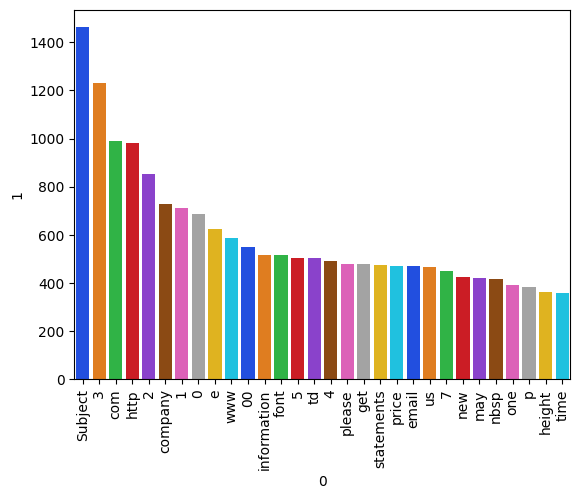

In [36]:
sns.barplot(data = filterSP, x = filterSP[0], y = filterSP[1], palette = 'bright')
plt.xticks(rotation = 90)
plt.show()

In [37]:
filterNS=pd.DataFrame(Counter(nonspam_words).most_common(30))
filterNS

,0,1
0,ect,13690
1,hou,7174
2,enron,6442
3,2000,4209
4,Subject,3531
5,gas,2750
6,deal,2735
7,com,2713
8,subject,2677
9,please,2653


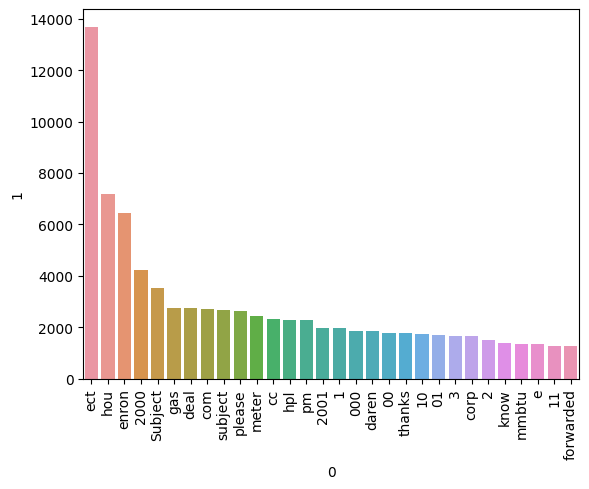

In [38]:
sns.barplot(data=filterNS,x=filterNS[0],y=filterNS[1])
plt.xticks(rotation = 90)
plt.show()

## Fix input and target features

In [39]:
X= data['text']
y=data['label_num']

 ## Model Building

In [40]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer(max_features = 3000)

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

text_data = data['text'].apply(lambda x: ' '.join(x))

X = tfidf.fit_transform(text_data).toarray()
y = data['label_num'].values


In [42]:
data

,text,label_num,num_characters,num_words,num_sentence
0,"[Subject, enron, methanol, meter, 988291, foll...",0,327,68,3
1,"[Subject, hpl, nom, january, 9, 2001, see, att...",0,97,24,3
2,"[Subject, neon, retreat, ho, ho, ho, around, w...",0,2524,551,24
3,"[Subject, photoshop, windows, office, cheap, m...",1,414,49,3
4,"[Subject, indian, springs, deal, book, teco, p...",0,336,71,3
...,...,...,...,...,...
5165,"[Subject, fw, crosstex, energy, driscoll, ranc...",0,869,197,9
5166,"[Subject, put, 10, ft, transport, volumes, dec...",0,534,156,7
5167,"[Subject, 3, 4, 2000, following, noms, hpl, ta...",0,1114,306,13
5169,"[Subject, industrial, worksheets, august, 2000...",0,573,112,20


## Split into Train and Test Data

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 2)


## Model libaries

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

##  Initialize the Models

In [45]:
svc = SVC(kernel= "sigmoid", gamma  = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2 )
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xgb  = XGBClassifier(n_estimators = 50, random_state = 2)

In [46]:
clfs = {
    'SVC': svc,
    'KNN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'Adaboost': abc,
    'Bgc': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb

}

##Train the Models

In [47]:
from sklearn.metrics import accuracy_score, precision_score
def train_classifier(clfs, X_train, y_train, X_test, y_test):
    clfs.fit(X_train,y_train)
    y_pred = clfs.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy , precision

### Evaluate the Models

In [ ]:
accuracy_scores = []
precision_scores = []
for name , clfs in clfs.items():
    current_accuracy, current_precision = train_classifier(clfs, X_train, y_train, X_test, y_test)
    print()
    print("For: ", name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For:  SVC
Accuracy:  0.986986986986987
Precision:  0.9616613418530351

For:  KNN
Accuracy:  0.9569569569569569
Precision:  0.96415770609319

For:  NB
Accuracy:  0.908908908908909
Precision:  0.9953051643192489

For:  DT
Accuracy:  0.8718718718718719
Precision:  0.8129496402877698

For:  LR
Accuracy:  0.958958958958959
Precision:  0.8826979472140762

For:  RF
Accuracy:  0.978978978978979
Precision:  0.9488817891373802

For:  Adaboost
Accuracy:  0.94994994994995
Precision:  0.8841463414634146


##Conclusion
Developing a robust email spam detection system involves collecting labeled data, preprocessing it, extracting relevant features, choosing and training a machine learning model, evaluating its performance, and deploying it in a production environment. Regular maintenance and updates are crucial to adapt to changing spam patterns and ensure user privacy and legal compliance.